In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sqlite3

In [2]:
def getData():
    conn = sqlite3.connect('data.db', check_same_thread=False)
    c = conn.cursor()

    c.execute("SELECT pnl, pnl_percent from trades where timefram='15m'")
    data = c.fetchall()
    return data

profits = getData()
flow = [0]
pnl = []

[0, 0.344178291725855, 0.7276189697481572]


Text(0, 0.5, 'Amount ($)')

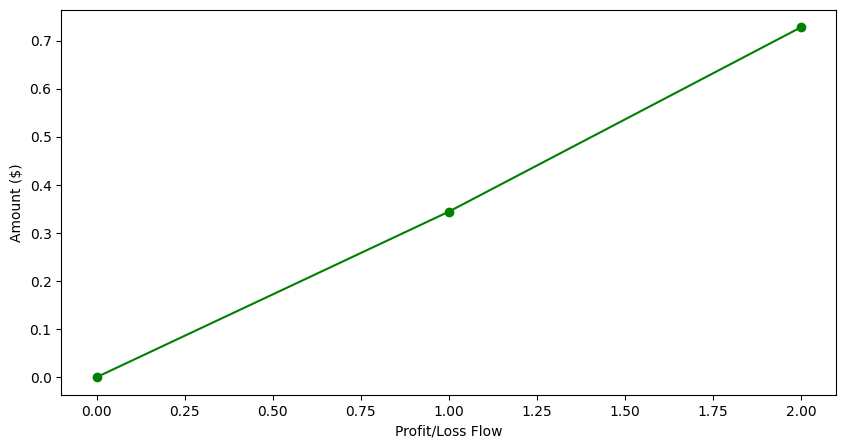

In [3]:
for i in profits:
    flow.append(i[0]+flow[-1] -0.07)
    pnl.append(i[0] - 0.07)

print(flow)
plt.figure(figsize=(10, 5))
plt.plot(flow, marker='o', color='g')
plt.xlabel("Profit/Loss Flow")
plt.ylabel("Amount ($)")

<BarContainer object of 3 artists>

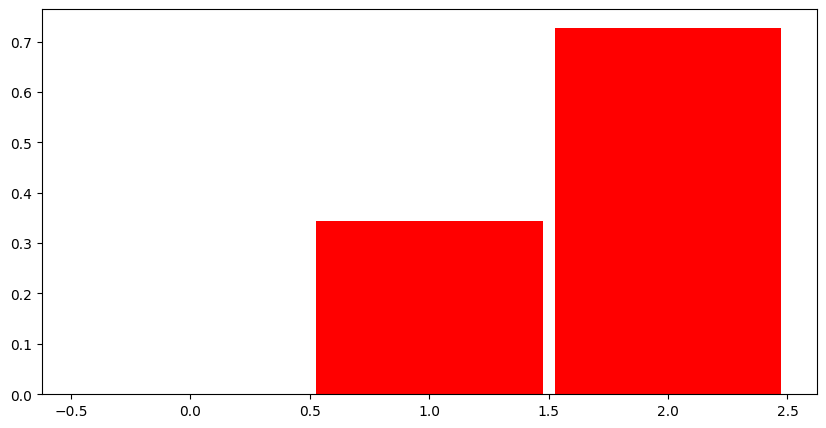

In [4]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(flow))],flow, color='red', width=0.95)

# Capital Growth

<BarContainer object of 2 artists>

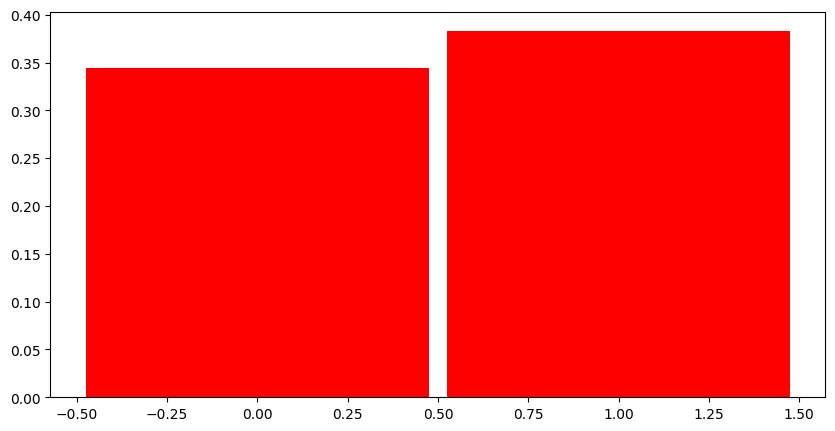

In [5]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(pnl))],pnl, color='red', width=0.95)

# PNL of completed trades